In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [5]:
def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] < mean - 3 * std) | (df[column] > mean + 3 * std)]
    if not outliers.empty:
        print(f"Removed outliers from {column}:\n{outliers}\n")
    return df[(df[column] >= mean - 3 * std) & (df[column] <= mean + 3 * std)]

def process_e_data(file_path, task_name):
    baseline = pd.read_csv('results/benchmark_results_sleep.csv')
    
    # Remove outliers from baseline data
    baseline = remove_outliers(baseline, 'Energy (Joules)')
    baseline_avg = baseline['Energy (Joules)'].mean()
    print(f"The average baseline energy after outlier removal is: {baseline_avg}")
    
    data = pd.read_csv(file_path)
    df = pd.DataFrame(data)
    
    # Remove outliers from the input data
    df = remove_outliers(df, 'Energy (Joules)')
    
    # Subtract baseline from energy column
    df['Energy (Joules)'] = (df['Energy (Joules)'] - baseline_avg) / 60

    # Remove values where energy after baseline subtraction is negative
    negative_values = df[df['Energy (Joules)'] < 0]
    print(f"Removed negative energy values:\n{negative_values}\n")
    df = df[df['Energy (Joules)'] >= 0]
    median_power = df.groupby('Browser')['Energy (Joules)'].median()
    print("Median Normalized Power (Middle line in violin plot) (Watts):\n", median_power)

    sns.set_style("white")
    # Create the violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Browser', y='Energy (Joules)', data=df, inner="quartile", 
                   order=["Chrome", "Firefox"],  # Ensure Chrome is on the left
                   palette={"Firefox": "skyblue", "Chrome": "lightcoral"})
    plt.title(f'Average Power by Browser in {task_name}')
    plt.xlabel('Browser')
    plt.ylabel('Average Power (Watts/W)')
    plt.show()
    
    sns.set_style("white")
    # Create the distribution plot
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x='Energy (Joules)', hue='Browser', kde=True, 
                 hue_order=["Chrome", "Firefox"],  # Ensure Chrome is on the left
                 palette={"Firefox": "skyblue", "Chrome": "lightcoral"})
    plt.title(f'Average Power Consumption by Browser in {task_name}')
    plt.xlabel('Average Power (Watts/W)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Perform t-test
    firefox = df[df['Browser'] == 'Firefox']['Energy (Joules)']
    chrome = df[df['Browser'] == 'Chrome']['Energy (Joules)']
    
    t_stat, p_val = ttest_ind(firefox, chrome)
    
    print(f'The p-value is: {p_val}')
    print(f'The t-statistic is: {t_stat}')


Removed outliers from Energy (Joules):
  Iteration Browser  Energy (Joules)
1         2   Sleep       862.780762

The average baseline energy after outlier removal is: 455.03820068
Removed negative energy values:
Empty DataFrame
Columns: [Iteration, Browser, Energy (Joules), Time (Seconds)]
Index: []

Median Normalized Power (Middle line in violin plot) (Watts):
 Browser
Chrome     22.513929
Firefox    32.368659
Name: Energy (Joules), dtype: float64


C:\Users\ymche\AppData\Local\Temp\ipykernel_31292\3951609204.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Browser', y='Energy (Joules)', data=df, inner="quartile",


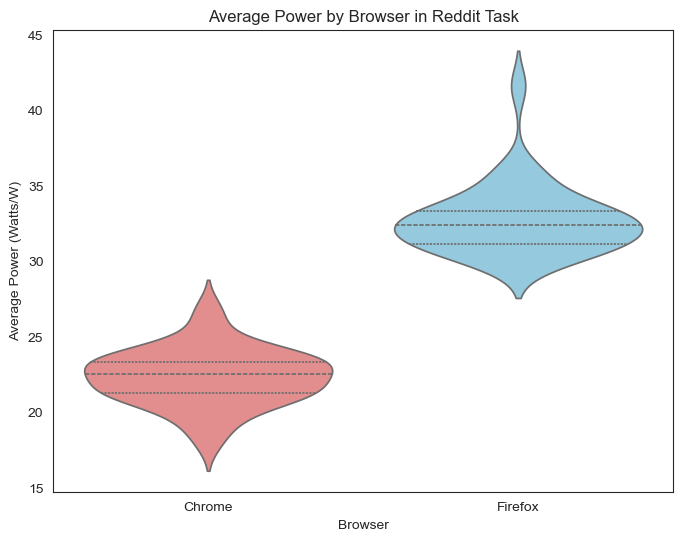

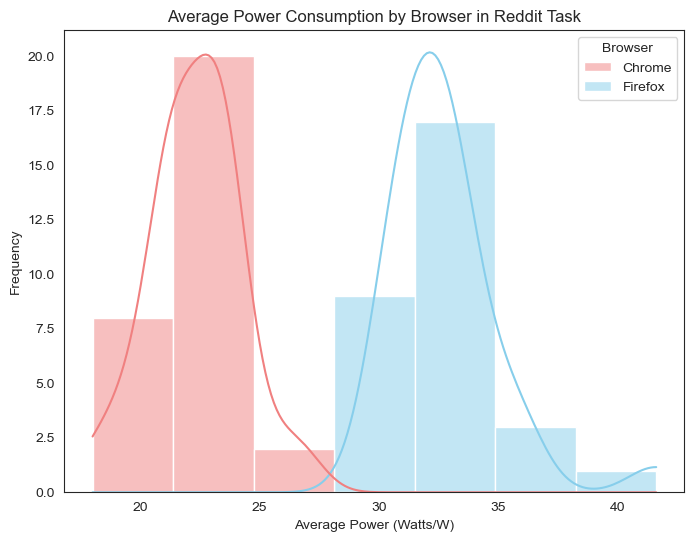

The p-value is: 7.801174979879008e-27
The t-statistic is: 19.221493605204035
Removed outliers from Energy (Joules):
  Iteration Browser  Energy (Joules)
1         2   Sleep       862.780762

The average baseline energy after outlier removal is: 455.03820068
Removed negative energy values:
Empty DataFrame
Columns: [Iteration, Browser, Energy (Joules), Time (Seconds)]
Index: []

Median Normalized Power (Middle line in violin plot) (Watts):
 Browser
Chrome     14.443798
Firefox    14.039714
Name: Energy (Joules), dtype: float64


C:\Users\ymche\AppData\Local\Temp\ipykernel_31292\3951609204.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Browser', y='Energy (Joules)', data=df, inner="quartile",


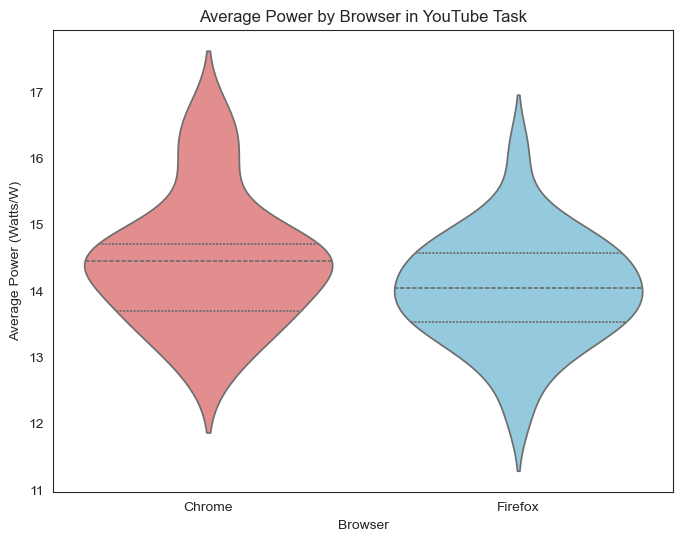

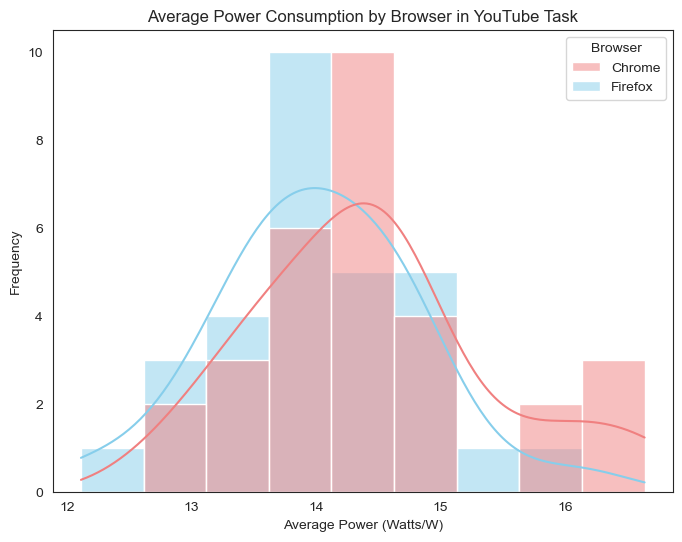

The p-value is: 0.06524471316373906
The t-statistic is: -1.8791990966360697


In [6]:
process_e_data('results/reddit_results_windows.csv', 'Reddit Task')
process_e_data('results/youtube_results_windows.csv', 'YouTube Task')